# 作業
### 用 digits (dataset.load_digits()) 資料嘗試跑 t-SNE

In [3]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [19]:
print(f'dir: {dir(digits)}')
print(f'data shape: {digits.data.shape}')
print(f'target shape: {digits.target.shape}')
print(f'target_names: {digits.target_names}')
print(f'images shape: {digits.images.shape}')
print(f'DESCR: {digits.DESCR}')

dir: ['DESCR', 'data', 'images', 'target', 'target_names']
data shape: (1797, 64)
target shape: (1797,)
target_names: [0 1 2 3 4 5 6 7 8 9]
images shape: (1797, 8, 8)
DESCR: .. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 con

In [21]:
digits.data[0:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import manifold

%matplotlib inline

In [25]:
n_samples, n_feature = X.shape
n_neighbors = 30
tsne = manifold.TSNE(n_components=2, random_state=0, init='pca',
                    learning_rate=200., early_exaggeration=12)

X_tsne = tsne.fit_transform(X)

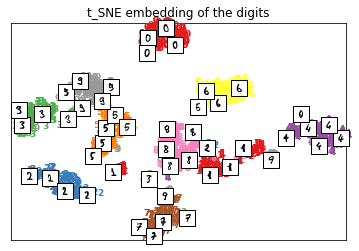

In [28]:
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X,0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    
    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                color=plt.cm.Set1(y[i]/10.),
                fontdict={'weight': 'bold', 'size': 9}
                )

    if hasattr(offsetbox, 'AnnotationBbox'):
        show_images = np.array([[1., 1.]])
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - show_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                continue
            show_images = np.r_[show_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

plot_embedding(X_tsne, "t_SNE embedding of the digits")
plt.show()